# Exploratory Data Analysis

Use this notebook to inspect raw data, check quality, and prototype features.

## Outline
- Setup and data loading
- Exploratory data analysis (schema, distributions, correlations)
- Data preparation and feature engineering
- Modeling prototypes (baseline, overfitting check, neural network)


## 1. Setup and Data Loading

Imports, display settings, and loading the raw CSV into a DataFrame.


In [81]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt

pd.options.display.max_columns = 100

# TODO: set your raw data path
raw_path = '../data/raw/278k_song_labelled.csv'

df = pd.read_csv(raw_path)
df.head()

,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
0,0,195000.0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,3.446154e-07,2
1,1,194641.0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1.464234e-07,1
2,2,217573.0,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,4.007850e-07,1
3,3,443478.0,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,7.959809e-08,0
4,4,225862.0,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,4.693131e-07,1


In [82]:
# Drop the useless column 'Unnamed: 0'
df = df.drop('Unnamed: 0', axis=1)


In [83]:
# Check quick information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277938 entries, 0 to 277937
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration (ms)     277938 non-null  float64
 1   danceability      277938 non-null  float64
 2   energy            277938 non-null  float64
 3   loudness          277938 non-null  float64
 4   speechiness       277938 non-null  float64
 5   acousticness      277938 non-null  float64
 6   instrumentalness  277938 non-null  float64
 7   liveness          277938 non-null  float64
 8   valence           277938 non-null  float64
 9   tempo             277938 non-null  float64
 10  spec_rate         277938 non-null  float64
 11  labels            277938 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 25.4 MB


In [84]:
# Check the number of columns
df.columns


Index(['duration (ms)', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'spec_rate', 'labels'],
      dtype='object')

## 2.1 Exploratory Data Analysis (EDA)

In this stage, Exploratory Data Analysis (EDA) is conducted to gain a comprehensive understanding of the structure, characteristics, and quality of the Spotify dataset before building the classification models. The EDA process includes examining the data schema, performing descriptive statistics, analyzing variable distributions, identifying missing values and potential outliers, and visualizing relationships among variables.

### Feature Description

The dataset consists of audio features extracted from Spotify, which capture various musical and acoustic characteristics of each track:

- **duration_ms**: Duration of the track in milliseconds.
- **danceability**: A measure of how suitable a track is for dancing, based on tempo, rhythm stability, and beat strength.
- **energy**: A measure of intensity and activity, representing how energetic a track feels.
- **loudness**: The overall loudness of a track, measured in decibels (dB).
- **speechiness**: The presence of spoken words in a track.
- **acousticness**: The likelihood that a track is acoustic.
- **instrumentalness**: The likelihood that a track contains no vocals.
- **liveness**: The probability that the track was recorded during a live performance.
- **valence**: A measure of the musical positivity conveyed by a track.
- **tempo**: The estimated tempo of a track in beats per minute (BPM).
- **spec_rate**: Spectral rate feature extracted during audio signal processing.


In [85]:
# TARGET = 40_000
# SEED = 42

# min_count = df["labels"].value_counts().min()
# if min_count < TARGET:
#     raise ValueError(f"Label nhỏ nhất chỉ có {min_count} mẫu, không thể downsample lên {TARGET} بدون lặp.")

# df = (
#     df.groupby("labels", group_keys=False)
#       .apply(lambda g: g.sample(n=TARGET, replace=False, random_state=SEED))
#       .reset_index(drop=True)
# )

# print(df["labels"].value_counts())

In [86]:
y = df['labels']
X = df.drop('labels', axis=1)
print(y.head())
print(X.head())

0    2
1    1
2    1
3    0
4    1
Name: labels, dtype: int64
   duration (ms)  danceability  energy  loudness  speechiness  acousticness  \
0       195000.0         0.611   0.614    -8.815       0.0672        0.0169   
1       194641.0         0.638   0.781    -6.848       0.0285        0.0118   
2       217573.0         0.560   0.810    -8.029       0.0872        0.0071   
3       443478.0         0.525   0.699    -4.571       0.0353        0.0178   
4       225862.0         0.367   0.771    -5.863       0.1060        0.3650   

   instrumentalness  liveness  valence    tempo     spec_rate  
0          0.000794    0.7530    0.520  128.050  3.446154e-07  
1          0.009530    0.3490    0.250  122.985  1.464234e-07  
2          0.000008    0.2410    0.247  170.044  4.007850e-07  
3          0.000088    0.0888    0.199   92.011  7.959809e-08  
4          0.000001    0.0965    0.163  115.917  4.693131e-07  


In [87]:
# Statiscal description of data
X.describe()

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate
count,2.779380e+05,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,2.779380e+05
mean,2.324961e+05,0.552583,0.556866,-10.363654,0.087913,0.386583,0.255044,0.189217,0.449602,119.196002,4.754654e-07
std,1.171830e+05,0.188905,0.279681,6.672049,0.112500,0.364504,0.373745,0.163596,0.267471,30.462256,9.190229e-07
min,6.706000e+03,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.720130e+05,0.431000,0.342000,-12.747000,0.035900,0.033800,0.000000,0.096200,0.220000,95.072250,1.531461e-07
50%,2.131055e+05,0.571000,0.591000,-8.397000,0.047100,0.262000,0.001090,0.121000,0.434000,119.940000,2.345459e-07
75%,2.648660e+05,0.693000,0.792000,-5.842000,0.082200,0.754000,0.645000,0.227000,0.665000,138.869750,4.449937e-07
max,3.919895e+06,0.989000,1.000000,4.882000,0.965000,0.996000,1.000000,1.000000,1.000000,244.947000,5.971860e-05


### Distribution Analysis and Outliers
- Most audio features are normalized to [0,1], except loudness (log-scaled in dB).
- Several features (e.g., speechiness, instrumentalness, liveness) exhibit zero-inflated and right-skewed distributions.
- High values in speechiness and liveness are rare but valid, reflecting spoken-word and live recordings.
- Instrumentalness shows a strong mass at zero, consistent with the dominance of vocal tracks.


In [88]:
# Check null values
X.isnull().sum()

duration (ms)       0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
spec_rate           0
dtype: int64

labels
1    106429
0     82058
2     47065
3     42386
Name: count, dtype: int64


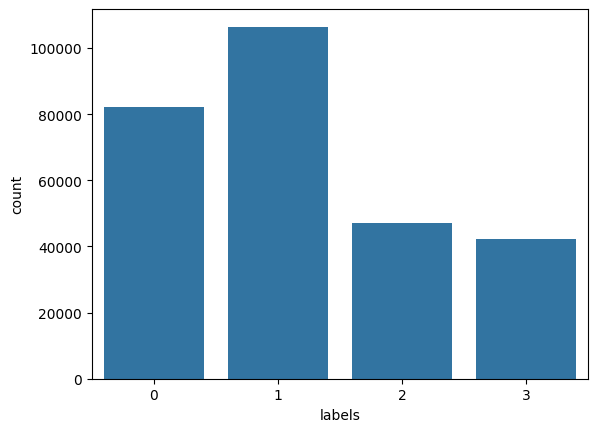

In [89]:
print(y.value_counts())
sns.countplot(x=y)
plt.show()

### Label Distribution Notes

The label distribution indicates a moderately imbalanced multi-class dataset, with the ?happy? class having the highest number of samples, 
while ?energetic? and ?calm? are underrepresented. Due to this class imbalance, accuracy alone is not a sufficient evaluation metric. 
Therefore, additional metrics such as precision, recall,and F1-score (especially macro-averaged F1) are more appropriate for evaluating model performance.


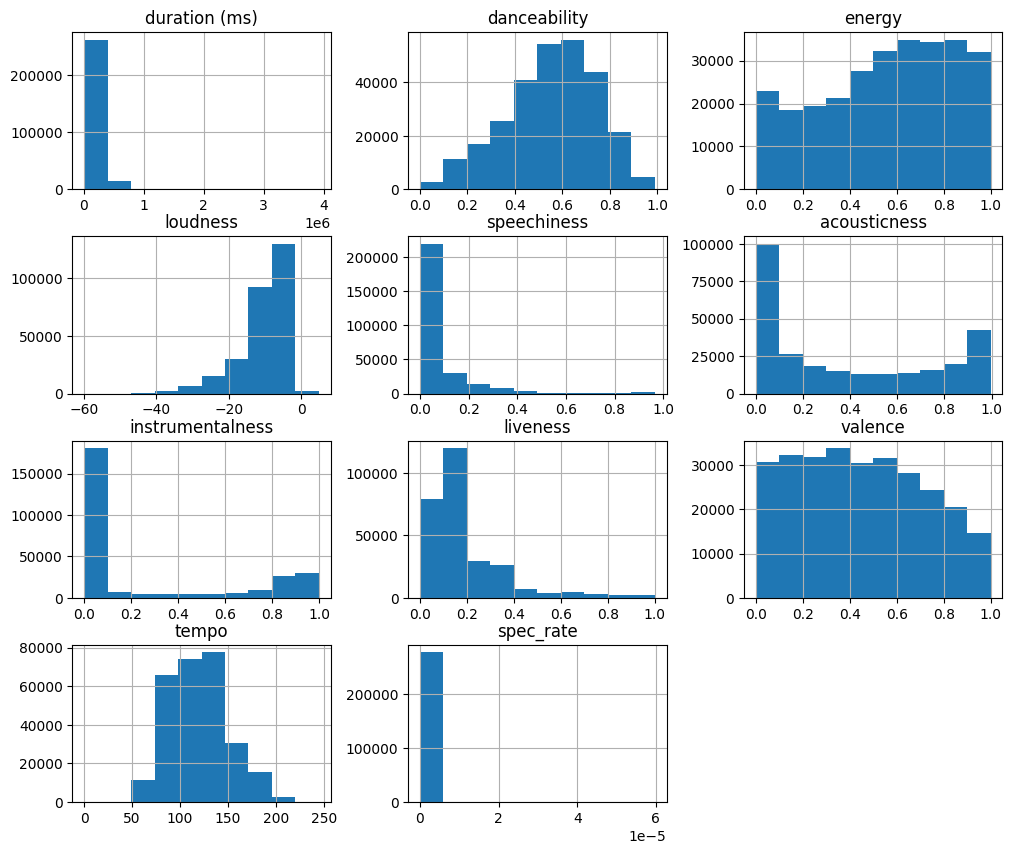

In [90]:
X.hist(figsize=(12, 10))
plt.show()

### Feature Distribution Notes
- Duration_ms shows a strongly right-skewed distribution, indicating that most tracks have moderate lengths while a small number of tracks are significantly longer.
- Danceability exhibits a relatively symmetric distribution centered around mid-range values, suggesting balanced variation in rhythmic suitability across tracks.
- Energy is slightly left-skewed with values concentrated at higher levels, reflecting that many tracks in the dataset are perceived as energetic.
- Loudness follows a left-skewed distribution consistent with decibel scaling and contains valid extreme values corresponding to quieter tracks.
- Speechiness shows a highly right-skewed distribution with a long tail, indicating that most tracks contain minimal spoken content.
- Acousticness displays a wide and bimodal-like distribution, suggesting a mixture of highly acoustic and highly electronic tracks.
- Instrumentalness is zero-inflated, with most tracks containing vocals and a smaller subset being purely instrumental.
- Liveness is right-skewed, reflecting the dominance of studio recordings over live performances.
- Valence exhibits a broad and relatively uniform distribution, indicating diverse emotional tones across the dataset.
- Tempo follows an approximately normal distribution centered around common popular music tempos.
- Spec_rate shows a highly right-skewed distribution with values concentrated near zero, suggesting the need for careful scaling during preprocessing.


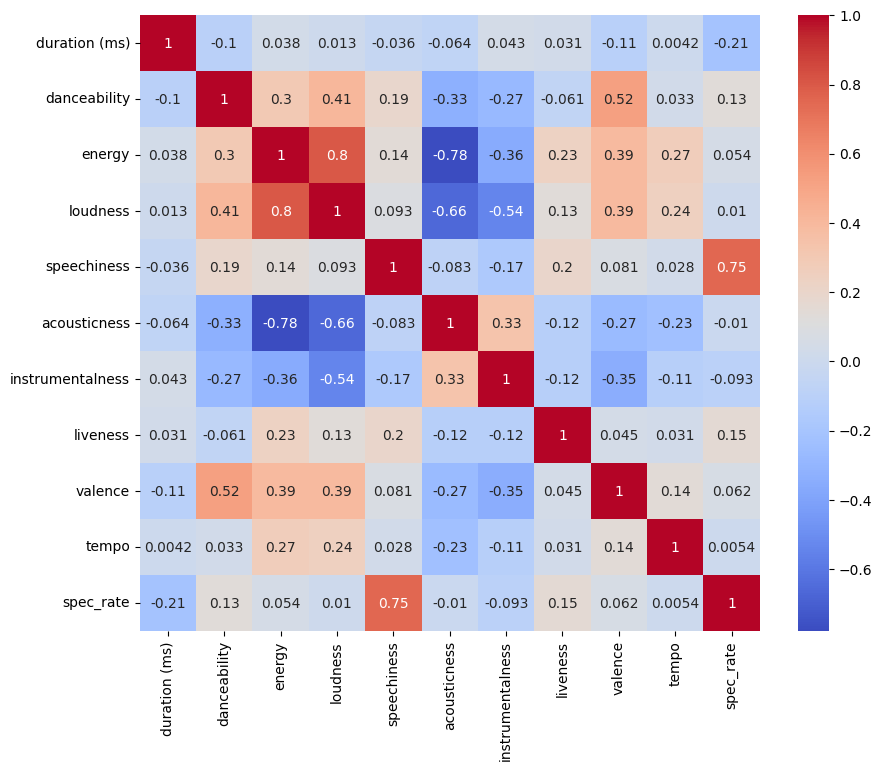

In [91]:
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm")
plt.show()

### Correlation Insights
- The correlation analysis reveals several meaningful relationships among audio features.
- Energy and loudness exhibit a strong positive correlation, reflecting their shared association with perceived intensity. 
- Acousticness shows strong negative correlation with energy and loudness, indicating that highly acoustic tracks tend to be less intense.
- Danceability and valence are moderately correlated, suggesting a relationship between rhythmic suitability and emotional positivity.
- Most other feature pairs display low correlations, indicating limited multicollinearity and suggesting that many features may provide complementary information for modeling.


In [92]:
# Remove the duration and spec_rate columns.
X = X.drop('duration (ms)', axis=1)
X = X.drop('spec_rate', axis=1)


In [93]:
X.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050
1,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985
2,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044
3,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011
4,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917


In [94]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

features = [
    "danceability", "energy", "loudness",
    "speechiness", "acousticness", "instrumentalness",
    "liveness", "valence", "tempo"
]

# ensure y is categorical for x-axis
y_cat = pd.Series(y).astype(str)

rows, cols = 3, 3
fig = make_subplots(
    rows=rows, cols=cols,
    subplot_titles=[f"<i>{f}</i>" for f in features]
)

for i, feat in enumerate(features):
    r = i // cols + 1
    c = i % cols + 1
    fig.add_trace(
        go.Box(name=feat, x=y_cat, y=X[feat]),
        row=r, col=c
    )

fig.update_layout(
    height=900,
    width=900,
    title_text="<b>Feature Distributions Across Labels</b>",
    title_x=0.5,
    showlegend=False
)

pio.renderers.default = "browser"
fig.show()

### Boxplot Insights by Label

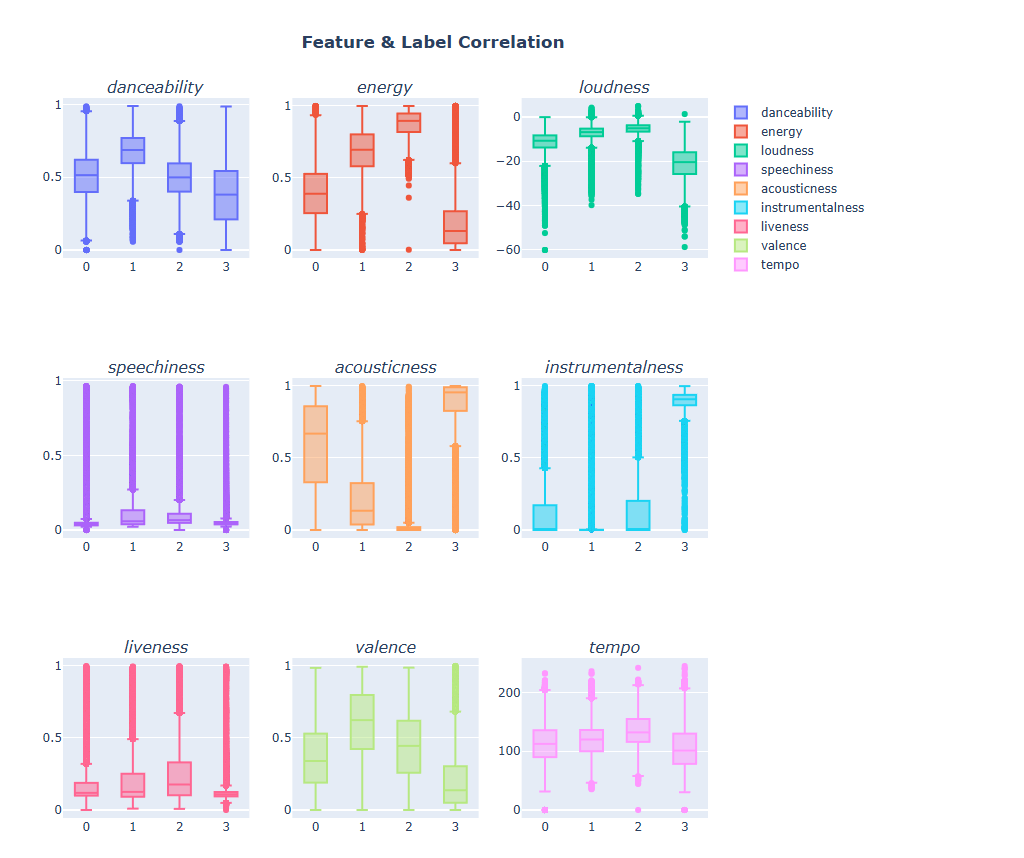
- The boxplots reveal clear distributional differences across mood labels for several audio features.
- Energy, loudness, valence, danceability, and acousticness exhibit strong median shifts, indicating high discriminative potential. 
- Instrumentalness and tempo also show meaningful label-dependent patterns, particularly for calm and energetic moods. 
- In contrast, speechiness and liveness display substantial overlap across labels, suggesting weaker standalone predictive power but potential complementary value when combined with other features.


## 2.2 Data Preparation & Feature Engineering

- The dataset contains no missing values, and zero values were verified as valid domain-specific measurements, therefore, no imputation was required.
- All input features are numerical Spotify audio descriptors, so no categorical encoding was applied. 
- Due to differences in feature scales, StandardScaler was used after the train-validation split to prevent data leakage. 
- Limited, domain-driven feature engineering was performed on skewed features to improve model stability while preserving interpretability.


## 3. Modeling Prototypes

Quick baselines and diagnostics to validate feature choices and data prep.


In [95]:
import sys
!"{sys.executable}" -m pip install -U scikit-learn

### Baseline: Logistic Regression + Feature Engineering

Adds domain features, scales inputs, and reports Macro F1 with a classification report.


In [96]:
results = []  # global list

def log_result(model_name, train_f1, val_f1, test_f1, best_param=None, notes=None):
    results.append({
        "model": model_name,
        "train_macro_f1": float(train_f1),
        "val_macro_f1": float(val_f1),
        "test_macro_f1": float(test_f1),
        "gap_train_val": float(train_f1 - val_f1),
        "best_param": best_param,
        "notes": notes
    })

Train: (194556, 11) Val: (41691, 11) Test: (41691, 11)
Class weights (info): {0: 0.8467645061889592, 1: 0.6528724832214765, 2: 1.47636970708757, 3: 1.6393326592517694}


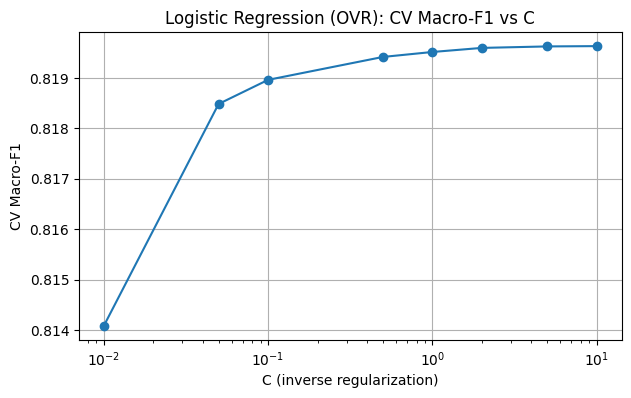

Best C (CV): 10 | Best CV Macro-F1: 0.8196

=== Logistic Regression (Tree-style, B1) ===
Train Macro-F1: 0.8196
Val   Macro-F1: 0.8202
Test  Macro-F1: 0.8195
Gap (Train-Val): -0.0006

[VAL] Classification report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81     12309
           1       0.82      0.77      0.80     15964
           2       0.70      0.82      0.75      7060
           3       0.87      0.98      0.92      6358

    accuracy                           0.81     41691
   macro avg       0.81      0.84      0.82     41691
weighted avg       0.82      0.81      0.81     41691


[TEST] Classification report:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81     12308
           1       0.83      0.77      0.80     15965
           2       0.70      0.83      0.76      7060
           3       0.86      0.97      0.91      6358

    accuracy                           0.81     4

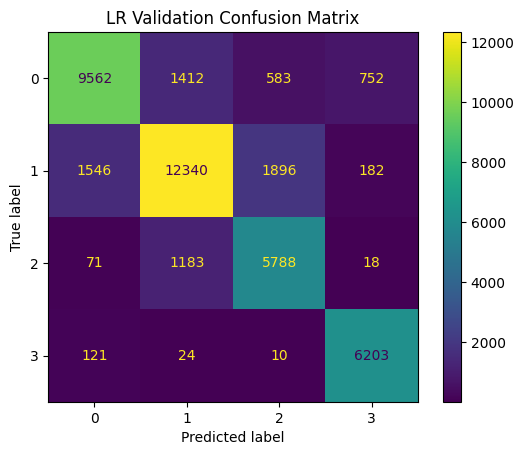

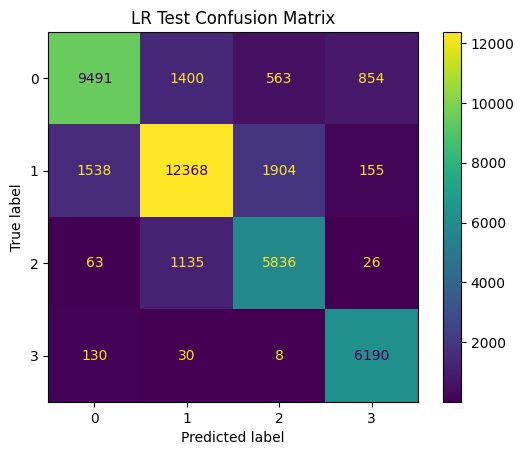

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_class_weight
from sklearn.base import clone

SEED = 42

# =========================
# 1) Select features + target
# =========================
feature_cols = [
    "duration (ms)", "danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "liveness", "valence", "tempo", "spec_rate"
]

X = df[feature_cols].copy()
y = df["labels"].astype(int).copy()

assert len(X) == len(y), "X and y lengths do not match."

# ===== Split 70/15/15 =====
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=SEED
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=SEED
)

print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)

# Just to inspect weights (not used as sample_weight in B1)
classes = np.unique(y_train)
cw = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
cw_map = {int(c): float(w) for c, w in zip(classes, cw)}
print("Class weights (info):", cw_map)

# =========================
# 2) Feature engineering
# =========================
def add_features(X_in):
    if not isinstance(X_in, pd.DataFrame):
        X_in = pd.DataFrame(X_in, columns=feature_cols)

    X_ = X_in.copy()
    X_["intensity"] = X_["energy"] * (-X_["loudness"])
    X_["rhythm_drive"] = X_["danceability"] * X_["tempo"]
    X_["calm_score"] = X_["acousticness"] + X_["instrumentalness"]
    return X_

feat_eng = FunctionTransformer(add_features, validate=False)

# =========================
# 3) Pipeline factory (OVR + class_weight balanced)
# =========================
def lr_pipe_factory(C):
    base_lr = LogisticRegression(
        C=C,
        solver="liblinear",        # works in old sklearn
        class_weight="balanced",   # B1: balance here, NO sample_weight
        max_iter=2000
    )
    return Pipeline([
        ("feat_eng", feat_eng),
        ("scaler", StandardScaler()),
        ("model", OneVsRestClassifier(base_lr))
    ])

# =========================
# 4) Tune C by CV Macro-F1 (tree-style)
# =========================
def cv_macro_f1_no_weights(pipe, X, y, cv):
    scores = []
    for tr_idx, va_idx in cv.split(X, y):
        X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
        y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]

        m = clone(pipe)
        m.fit(X_tr, y_tr)  # no sample_weight
        y_hat = m.predict(X_va)

        scores.append(f1_score(y_va, y_hat, average="macro"))
    return float(np.mean(scores)), scores

C_GRID = [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10]
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

cv_scores = []
for C in C_GRID:
    pipe = lr_pipe_factory(C)
    mean_f1, _ = cv_macro_f1_no_weights(pipe, X_train, y_train, cv)
    cv_scores.append(mean_f1)

best_idx = int(np.argmax(cv_scores))
best_C = C_GRID[best_idx]
best_cv_f1 = float(cv_scores[best_idx])

plt.figure(figsize=(7,4))
plt.plot(C_GRID, cv_scores, marker="o")
plt.xscale("log")
plt.xlabel("C (inverse regularization)")
plt.ylabel("CV Macro-F1")
plt.title("Logistic Regression (OVR): CV Macro-F1 vs C")
plt.grid(True)
plt.show()

print(f"Best C (CV): {best_C} | Best CV Macro-F1: {best_cv_f1:.4f}")

# =========================
# 5) Fit final + Evaluate Train/Val/Test
# =========================
final_pipe = lr_pipe_factory(best_C)
final_pipe.fit(X_train, y_train)

y_tr_pred = final_pipe.predict(X_train)
y_va_pred = final_pipe.predict(X_val)
y_te_pred = final_pipe.predict(X_test)

tr_f1 = float(f1_score(y_train, y_tr_pred, average="macro"))
va_f1 = float(f1_score(y_val, y_va_pred, average="macro"))
te_f1 = float(f1_score(y_test, y_te_pred, average="macro"))

log_result("LogReg (OVR)", tr_f1, va_f1, te_f1, best_param=f"C={best_C}")

print("\n=== Logistic Regression (Tree-style, B1) ===")
print(f"Train Macro-F1: {tr_f1:.4f}")
print(f"Val   Macro-F1: {va_f1:.4f}")
print(f"Test  Macro-F1: {te_f1:.4f}")
print(f"Gap (Train-Val): {tr_f1 - va_f1:.4f}")

print("\n[VAL] Classification report:")
print(classification_report(y_val, y_va_pred))

print("\n[TEST] Classification report:")
print(classification_report(y_test, y_te_pred))

ConfusionMatrixDisplay.from_predictions(y_val, y_va_pred)
plt.title("LR Validation Confusion Matrix")
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test, y_te_pred)
plt.title("LR Test Confusion Matrix")
plt.show()


### Tree-Based Models

Compares RandomForest, XGBoost, and LightGBM using train vs validation Macro F1.


In [98]:
# ============================================================
# - Split train/val (stratified)
# - Compute sample_weight from class_weight (balanced)
# - Pipeline: feature engineering + model
# - 1) Baseline train/val Macro-F1 + gap table
# - 2) Grid search over n_estimators for each model
#    -> pick smallest n within tolerance of best val Macro-F1
# - 3) Plot curves (train/val vs n_estimators) per model
# - 4) Fit final best-overall model using chosen n_estimators
# ============================================================

import numpy as np
import pandas as pd
import random

from copy import deepcopy

from sklearn.model_selection import train_test_split, learning_curve, StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_class_weight

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

SEED = 42
np.random.seed(SEED)
random.seed(SEED)
# -------------------------
# 0) Prepare X, y
# -------------------------
feature_cols = [
    "duration (ms)", "danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "liveness", "valence", "tempo",
]

X = df[feature_cols].copy()
y = df["labels"].astype(int).copy()

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=SEED
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=SEED
)

# sample_weight (balanced)
classes = np.unique(y_train)
cw = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
cw_map = {int(c): float(w) for c, w in zip(classes, cw)}
train_sample_weight = y_train.map(cw_map).to_numpy()

print("Class weights:", cw_map)
# -------------------------
# 1) Feature engineering
# -------------------------
def add_features(X_in):
    X_ = X_in.copy()
    X_["intensity"] = X_["energy"] * (-X_["loudness"])
    X_["rhythm_drive"] = X_["danceability"] * X_["tempo"]
    X_["calm_score"] = X_["acousticness"] + X_["instrumentalness"]
    return X_

feat_eng = FunctionTransformer(add_features, validate=False)

def tune_n_estimators_cv_f1(pipe_factory, Xtr, ytr, n_grid, cv_splits=5):
    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=SEED)
    scores = []

    for n in n_grid:
        pipe = pipe_factory(n)
        cv_score = cross_val_score(
            pipe, Xtr, ytr,
            cv=cv,
            scoring="f1_macro",
            n_jobs=-1
        )
        scores.append(cv_score.mean())

    best_idx = int(np.argmax(scores))
    best_n = int(n_grid[best_idx])
    best_cv = float(scores[best_idx])

    plt.figure(figsize=(7,4))
    plt.plot(n_grid, scores, marker="o")
    plt.title("CV Macro-F1 vs n_estimators")
    plt.xlabel("n_estimators")
    plt.ylabel("CV Macro-F1")
    plt.grid(True)
    plt.show()

    return best_n, best_cv


def fit_val_test_macro_f1(pipe_factory, Xtr, ytr, Xva, yva, Xte, yte,
                          n_grid, cv_splits=5, train_sample_weight=None):
    best_n, best_cv = tune_n_estimators_cv_f1(pipe_factory, Xtr, ytr, n_grid, cv_splits=cv_splits)

    pipe = pipe_factory(best_n)

    fit_kwargs = {}
    if train_sample_weight is not None:
        fit_kwargs["model__sample_weight"] = train_sample_weight  # <-- pipeline param

    pipe.fit(Xtr, ytr, **fit_kwargs)

    tr_pred = pipe.predict(Xtr)
    va_pred = pipe.predict(Xva)
    te_pred = pipe.predict(Xte)

    tr_f1 = float(f1_score(ytr, tr_pred, average="macro"))
    va_f1 = float(f1_score(yva, va_pred, average="macro"))
    te_f1 = float(f1_score(yte, te_pred, average="macro"))

    print(f"Best n_estimators (CV): {best_n} | best CV Macro-F1: {best_cv:.4f}")
    print(f"Train Macro-F1: {tr_f1:.4f} | Val Macro-F1: {va_f1:.4f} | Test Macro-F1: {te_f1:.4f}")
    print(f"Gap (Train - Val): {tr_f1 - va_f1:.4f}")

    print("\n[VAL] Classification report:")
    print(classification_report(yva, va_pred))

    print("\n[TEST] Classification report:")
    print(classification_report(yte, te_pred))

    ConfusionMatrixDisplay.from_predictions(yva, va_pred)
    plt.title("Validation Confusion Matrix")
    plt.show()

    ConfusionMatrixDisplay.from_predictions(yte, te_pred)
    plt.title("Test Confusion Matrix")
    plt.show()

    return {
        "pipe": pipe,
        "best_n": best_n,
        "best_cv_macro_f1": best_cv,
        "train_macro_f1": tr_f1,
        "val_macro_f1": va_f1,
        "test_macro_f1": te_f1,
    }

Class weights: {0: 0.8467766505194528, 1: 0.6528722267244518, 2: 1.4763491979177732, 3: 1.639314046418355}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

def rf_pipe_factory(n):
    return Pipeline([
        ("feat_eng", feat_eng),
        ("model", RandomForestClassifier(
            n_estimators=n,
            max_depth=None,
            min_samples_split=2,
            min_samples_leaf=1,
            max_features="sqrt",
            bootstrap=True,
            n_jobs=-1,
            random_state=SEED,
            class_weight=None
        ))
    ])

RF_N_GRID = [50, 100, 150, 200, 300, 400, 600]

rf_out = fit_val_test_macro_f1(
    rf_pipe_factory,
    X_train, y_train, X_val, y_val, X_test, y_test,
    n_grid=RF_N_GRID,
    cv_splits=5,
    train_sample_weight=train_sample_weight
)
log_result("RandomForest", rf_out["train_macro_f1"], rf_out["val_macro_f1"], rf_out["test_macro_f1"],
           best_param=f"n={rf_out['best_n']}")


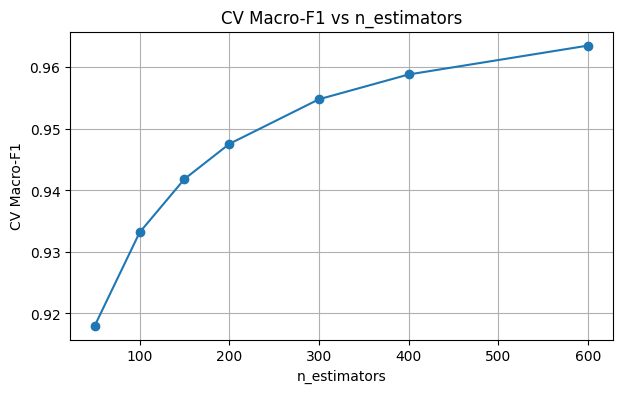

Best n_estimators (CV): 600 | best CV Macro-F1: 0.9635
Train Macro-F1: 0.9811 | Val Macro-F1: 0.9613 | Test Macro-F1: 0.9610
Gap (Train - Val): 0.0198

[VAL] Classification report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8206
           1       0.97      0.94      0.96     10643
           2       0.91      0.97      0.94      4706
           3       0.97      0.99      0.98      4239

    accuracy                           0.96     27794
   macro avg       0.96      0.97      0.96     27794
weighted avg       0.96      0.96      0.96     27794


[TEST] Classification report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8206
           1       0.97      0.94      0.96     10643
           2       0.91      0.97      0.94      4707
           3       0.98      0.99      0.98      4238

    accuracy                           0.96     27794
   macro avg       0.96    

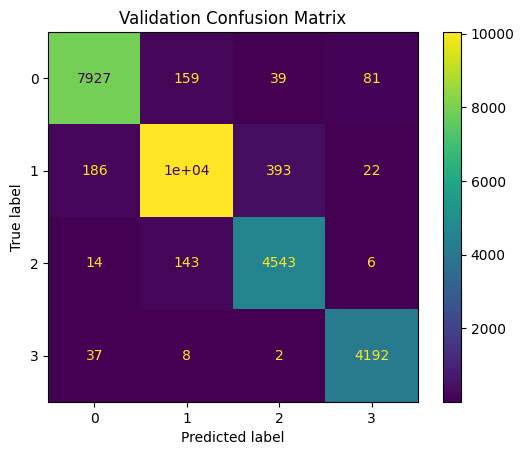

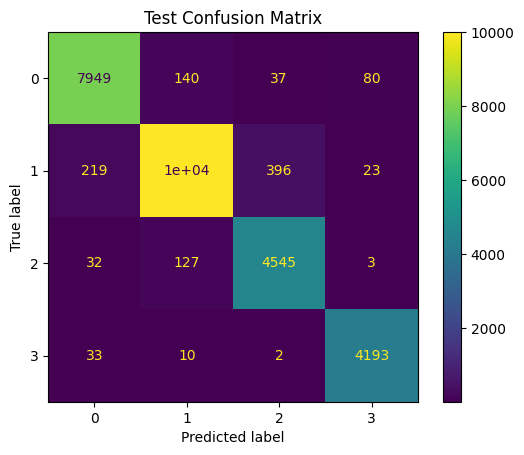

In [ ]:
from xgboost import XGBClassifier

num_class = len(np.unique(y_train))

def xgb_pipe_factory(n):
    return Pipeline([
        ("feat_eng", feat_eng),
        ("model", XGBClassifier(
            n_estimators=n,
            learning_rate=0.05,
            max_depth=6,
            subsample=0.9,
            colsample_bytree=0.9,
            reg_lambda=1.0,
            objective="multi:softprob",
            num_class=num_class,
            eval_metric="mlogloss",
            tree_method="hist",
            random_state=SEED,
            n_jobs=-1
        ))
    ])

XGB_N_GRID = [50, 100, 150, 200, 300, 400, 600]

xgb_out = fit_val_test_macro_f1(
    xgb_pipe_factory,
    X_train, y_train, X_val, y_val, X_test, y_test,
    n_grid=XGB_N_GRID,
    cv_splits=5,
    train_sample_weight=train_sample_weight
)

log_result("XGBoost", xgb_out["train_macro_f1"], xgb_out["val_macro_f1"], xgb_out["test_macro_f1"],
           best_param=f"n={xgb_out['best_n']}")

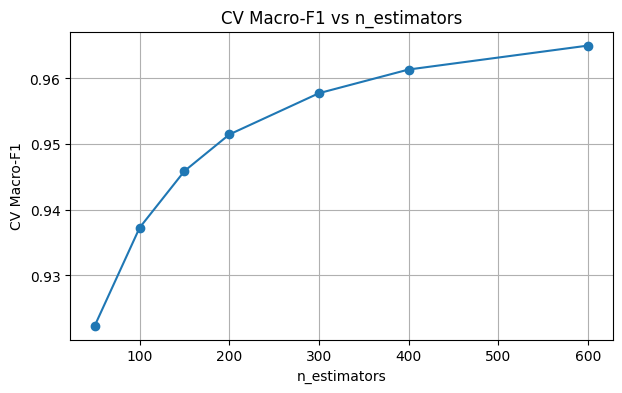

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003375 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3313
[LightGBM] [Info] Number of data points in the train set: 222350, number of used features: 13
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
Best n_estimators (CV): 600 | best CV Macro-F1: 0.9650
Train Macro-F1: 0.9860 | Val Macro-F1: 0.9635 | Test Macro-F1: 0.9629
Gap (Train - Val): 0.0225

[VAL] Classification report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8206
           1       0.97      0.95      0.96     10643
           2       0.92      0.97      0.94      4706
           3    

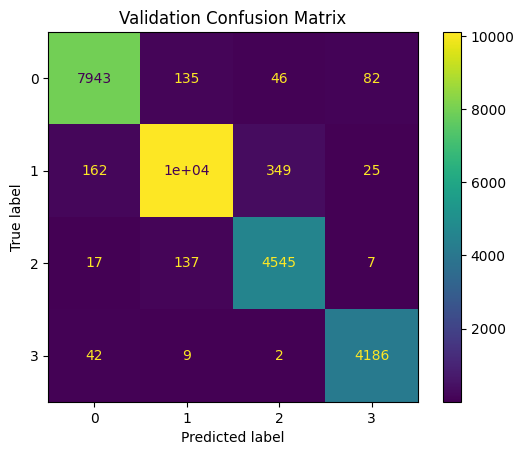

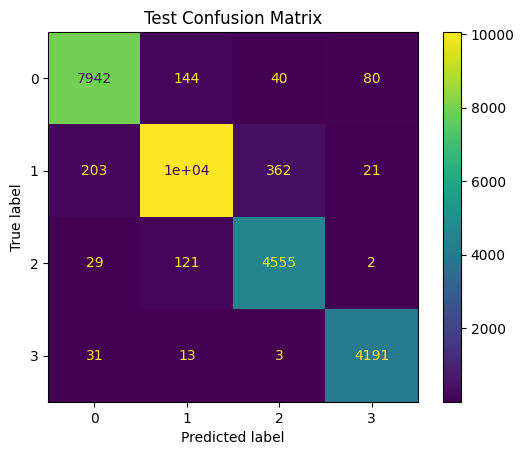

In [ ]:
from lightgbm import LGBMClassifier

def lgbm_pipe_factory(n):
    return Pipeline([
        ("feat_eng", feat_eng),
        ("model", LGBMClassifier(
            n_estimators=n,
            learning_rate=0.03,
            num_leaves=61,
            subsample=0.9,
            colsample_bytree=0.9,
            max_depth=8,
            reg_lambda=1.2,
            objective="multiclass",
            random_state=SEED,
            n_jobs=-1
        ))
    ])

LGBM_N_GRID = [50, 100, 150, 200, 300, 400, 600]

lgbm_out = fit_val_test_macro_f1(
    lgbm_pipe_factory,
    X_train, y_train, X_val, y_val, X_test, y_test,
    n_grid=LGBM_N_GRID,
    cv_splits=5,
    train_sample_weight=train_sample_weight
)

log_result("LightGBM", lgbm_out["train_macro_f1"], lgbm_out["val_macro_f1"], lgbm_out["test_macro_f1"],
           best_param=f"n={lgbm_out['best_n']}")


### Neural Network: PyTorch MLP

A simple MLP with class-weighted loss, optional feature engineering, and validation reporting.


Device: cpu
Train: (194556, 13) Val: (41691, 13) Test: (41691, 13)
Train label counts:
 labels
0    57441
1    74500
2    32945
3    29670
Name: count, dtype: int64
Num features: 13 | Num classes: 4
Epoch 01 | Train Loss 0.3477 F1 0.8343 | Val Loss 0.3498 F1 0.8338 | Gap +0.0005
Epoch 02 | Train Loss 0.3160 F1 0.8486 | Val Loss 0.3176 F1 0.8484 | Gap +0.0002
Epoch 03 | Train Loss 0.2978 F1 0.8607 | Val Loss 0.3003 F1 0.8605 | Gap +0.0002
Epoch 04 | Train Loss 0.2836 F1 0.8633 | Val Loss 0.2860 F1 0.8636 | Gap -0.0003
Epoch 05 | Train Loss 0.2723 F1 0.8734 | Val Loss 0.2752 F1 0.8725 | Gap +0.0009
Epoch 06 | Train Loss 0.2640 F1 0.8769 | Val Loss 0.2671 F1 0.8757 | Gap +0.0012
Epoch 07 | Train Loss 0.2575 F1 0.8749 | Val Loss 0.2603 F1 0.8743 | Gap +0.0006
Epoch 08 | Train Loss 0.2500 F1 0.8805 | Val Loss 0.2530 F1 0.8795 | Gap +0.0010
Epoch 09 | Train Loss 0.2471 F1 0.8791 | Val Loss 0.2493 F1 0.8789 | Gap +0.0002
Epoch 10 | Train Loss 0.2421 F1 0.8875 | Val Loss 0.2465 F1 0.8866 | Gap

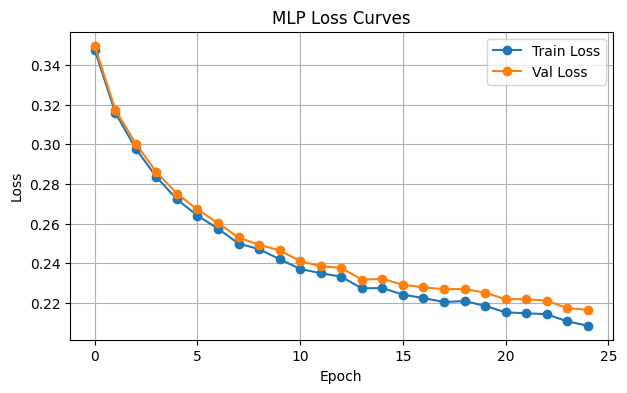

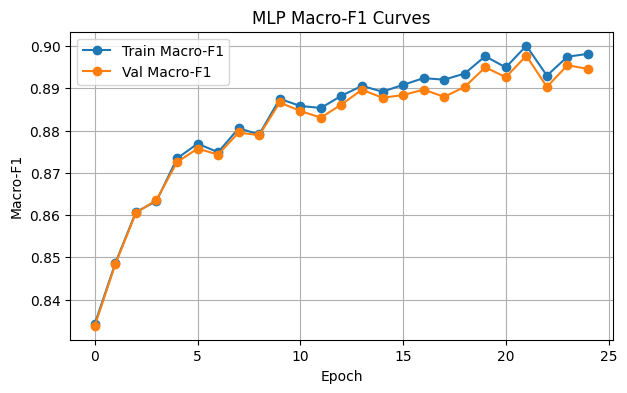

In [ ]:
# ============================================================
# - Split: Train/Val/Test (80/10/10) stratified
# - Feature engineering (optional)
# - StandardScaler fit on train only
# - Class-weighted CrossEntropyLoss
# - Reports: Train/Val/Test Macro-F1 + gap
# - Prints classification report + confusion matrix (VAL + TEST)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import f1_score, classification_report, confusion_matrix

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader



# -------------------------
# 0) CONFIG
# -------------------------
USE_FEATURE_ENGINEERING = True
SEED = 42

BATCH_SIZE = 1024
VAL_BATCH_SIZE = 4096
EPOCHS = 25
LR = 1e-3
WEIGHT_DECAY = 1e-4
PATIENCE = 5           # early stopping patience (optional but useful)

BASE_FEATURES = [
    "duration (ms)", "danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "liveness", "valence", "tempo",
]
TARGET_COL = "labels"

torch.manual_seed(SEED)
np.random.seed(SEED)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)


# -------------------------
# 1) BUILD DATA (X, y) + FE
# -------------------------
X = df[BASE_FEATURES].copy()
y = df[TARGET_COL].astype(int).copy()

if USE_FEATURE_ENGINEERING:
    X["intensity"] = X["energy"] * (-X["loudness"])
    X["rhythm_drive"] = X["danceability"] * X["tempo"]
    X["calm_score"] = X["acousticness"] + X["instrumentalness"]

feature_cols = list(X.columns)

# -------------------------
# 2) Split 70/15/15 (STRATIFIED)
# -------------------------
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=SEED
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=SEED
)

print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)
print("Train label counts:\n", y_train.value_counts().sort_index())

classes = np.unique(y_train)
num_classes = len(classes)

# -------------------------
# 3) SCALE (fit on train only)
# -------------------------
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s   = scaler.transform(X_val)
X_test_s  = scaler.transform(X_test)

# -------------------------
# 4) Torch tensors + loaders
# -------------------------
X_train_t = torch.tensor(X_train_s, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values, dtype=torch.long)

X_val_t = torch.tensor(X_val_s, dtype=torch.float32)
y_val_t = torch.tensor(y_val.values, dtype=torch.long)

X_test_t = torch.tensor(X_test_s, dtype=torch.float32)
y_test_t = torch.tensor(y_test.values, dtype=torch.long)

train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(TensorDataset(X_val_t, y_val_t),     batch_size=VAL_BATCH_SIZE, shuffle=False)
test_loader  = DataLoader(TensorDataset(X_test_t, y_test_t),   batch_size=VAL_BATCH_SIZE, shuffle=False)

num_features = X_train_t.shape[1]
print("Num features:", num_features, "| Num classes:", num_classes)


# -------------------------
# 5) MODEL
# -------------------------
class MLP(nn.Module):
    def __init__(self, in_dim, out_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.25),

            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.20),

            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.15),

            nn.Linear(32, out_dim)
        )

    def forward(self, x):
        return self.net(x)

model = MLP(num_features, num_classes).to(device)

# -------------------------
# 6) LOSS (class-weighted) + OPTIM
# -------------------------
class_w = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
class_w_t = torch.tensor(class_w, dtype=torch.float32).to(device)

criterion = nn.CrossEntropyLoss(weight=class_w_t)
optimizer = optim.AdamW(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)


# -------------------------
# 7) EVALUATION (Macro-F1)
# -------------------------
def eval_loader(model, loader):
    model.eval()
    all_preds, all_true = [], []
    total_loss, total_n = 0.0, 0

    with torch.no_grad():
        for xb, yb in loader:
            xb, yb = xb.to(device), yb.to(device)
            logits = model(xb)
            loss = criterion(logits, yb)

            preds = torch.argmax(logits, dim=1)
            all_preds.append(preds.cpu().numpy())
            all_true.append(yb.cpu().numpy())

            bs = yb.size(0)
            total_loss += loss.item() * bs
            total_n += bs

    y_pred = np.concatenate(all_preds)
    y_true = np.concatenate(all_true)

    macro_f1 = float(f1_score(y_true, y_pred, average="macro"))
    avg_loss = float(total_loss / max(total_n, 1))
    return avg_loss, macro_f1, y_true, y_pred


# -------------------------
# 8) TRAIN LOOP (tree-style logging + best by val f1)
# -------------------------
history = {"train_loss": [], "val_loss": [], "train_f1": [], "val_f1": []}

best_val_f1 = -1.0
best_state = None
patience_left = PATIENCE

for epoch in range(1, EPOCHS + 1):
    model.train()

    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()

    tr_loss, tr_f1, _, _ = eval_loader(model, train_loader)
    va_loss, va_f1, _, _ = eval_loader(model, val_loader)

    history["train_loss"].append(tr_loss)
    history["val_loss"].append(va_loss)
    history["train_f1"].append(tr_f1)
    history["val_f1"].append(va_f1)

    improved = va_f1 > best_val_f1 + 1e-6
    if improved:
        best_val_f1 = va_f1
        best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}
        patience_left = PATIENCE
    else:
        patience_left -= 1

    print(f"Epoch {epoch:02d} | Train Loss {tr_loss:.4f} F1 {tr_f1:.4f} "
          f"| Val Loss {va_loss:.4f} F1 {va_f1:.4f} | Gap {tr_f1 - va_f1:+.4f}")

    if PATIENCE is not None and patience_left <= 0:
        print(f"Early stopping at epoch {epoch} (no val improvement).")
        break

# load best
model.load_state_dict(best_state)

# -------------------------
# 9) FINAL: Train/Val/Test outputs (same style as trees)
# -------------------------
tr_loss, tr_f1, tr_true, tr_pred = eval_loader(model, train_loader)
va_loss, va_f1, va_true, va_pred = eval_loader(model, val_loader)
te_loss, te_f1, te_true, te_pred = eval_loader(model, test_loader)

print("\n================ FINAL (BEST VAL) ================")
print(f"Train Macro-F1: {tr_f1:.4f} | Loss: {tr_loss:.4f}")
print(f"Val   Macro-F1: {va_f1:.4f} | Loss: {va_loss:.4f}")
print(f"Test  Macro-F1: {te_f1:.4f} | Loss: {te_loss:.4f}")
print(f"Gap (Train-Val): {tr_f1 - va_f1:+.4f}")

print("\n[VAL] Classification Report:\n", classification_report(va_true, va_pred, digits=4))
print("[VAL] Confusion Matrix:\n", confusion_matrix(va_true, va_pred))

print("\n[TEST] Classification Report:\n", classification_report(te_true, te_pred, digits=4))
print("[TEST] Confusion Matrix:\n", confusion_matrix(te_true, te_pred))

# -------------------------
# 10) OPTIONAL: Curves (show only)
# -------------------------
plt.figure(figsize=(7,4))
plt.plot(history["train_loss"], marker="o", label="Train Loss")
plt.plot(history["val_loss"], marker="o", label="Val Loss")
plt.title("MLP Loss Curves")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(7,4))
plt.plot(history["train_f1"], marker="o", label="Train Macro-F1")
plt.plot(history["val_f1"], marker="o", label="Val Macro-F1")
plt.title("MLP Macro-F1 Curves")
plt.xlabel("Epoch")
plt.ylabel("Macro-F1")
plt.grid(True)
plt.legend()
plt.show()

log_result("MLP (PyTorch)", tr_f1, va_f1, te_f1, best_param=f"epochs={len(history['val_f1'])}", notes="best by val f1")


### The comparision table of 5 models

In [ ]:
summary = pd.DataFrame(results)

# Sort by validation macro f1 (most important for model selection)
summary_sorted = summary.sort_values(["val_macro_f1", "test_macro_f1"], ascending=False).reset_index(drop=True)
display(summary_sorted)

# --- Plot: Val vs Test Macro-F1 ---
plt.figure(figsize=(8,4))
x = np.arange(len(summary_sorted))
w = 0.35

plt.bar(x - w/2, summary_sorted["val_macro_f1"],  w, label="Val Macro-F1")
plt.bar(x + w/2, summary_sorted["test_macro_f1"], w, label="Test Macro-F1")
plt.xticks(x, summary_sorted["model"], rotation=20, ha="right")
plt.ylim(0, 1.05)
plt.ylabel("Macro-F1")
plt.title("Model Comparison (5 models)")
plt.grid(axis="y", alpha=0.3)
plt.legend()
plt.show()

# --- Plot: Overfit gap (Train - Val) ---
plt.figure(figsize=(8,4))
plt.bar(np.arange(len(summary_sorted)), summary_sorted["gap_train_val"])
plt.xticks(np.arange(len(summary_sorted)), summary_sorted["model"], rotation=20, ha="right")
plt.ylabel("Gap (Train - Val)")
plt.title("Overfit Gap Comparison")
plt.axhline(0.03, linestyle="--")
plt.axhline(0.07, linestyle="--")
plt.grid(axis="y", alpha=0.3)
plt.show()
